In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load data

path="F:\Munesh Backup\Munesh\Imarticus\Projects\Time Series\Super Store.csv"
store=pd.read_csv(path,encoding='cp1252')

In [3]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
store.shape

(2121, 21)

In [5]:
store.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [6]:
#checking for null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
#removing non important features
col=list(set(store.columns)-set(['Order Date','Sales']))
store.drop(col,axis=1,inplace=True)
store.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [8]:
store['Order Date']=pd.to_datetime(store['Order Date'])
#store=store.sort_values('Order Date')

In [9]:
store['Order Date'].min(),store['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
store=store.groupby('Order Date')['Sales'].sum()
store

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

In [11]:
store=store.reset_index()
store.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [12]:
#setting Date as index
store.set_index('Order Date',inplace=True)
store.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [13]:
y=store['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

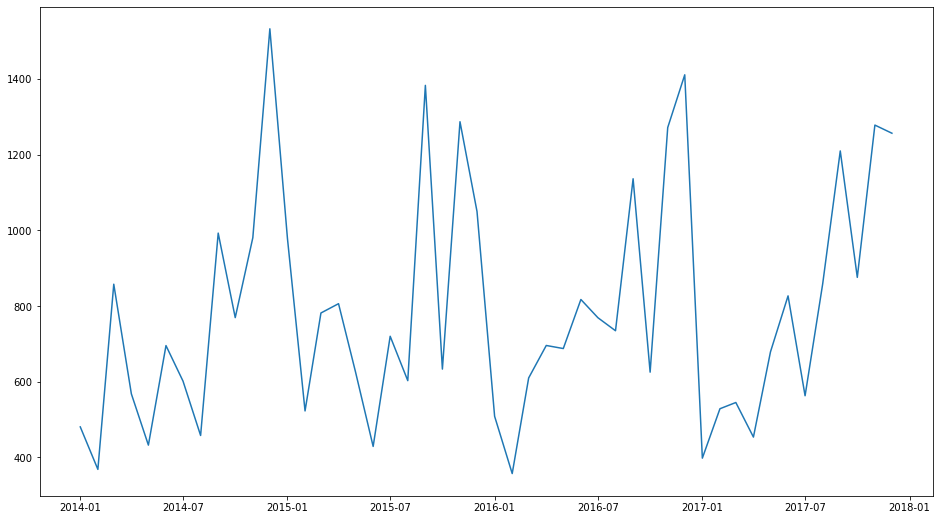

In [14]:
# Plotting the series
plt.figure(figsize=(16,9))
plt.plot(y)

In [15]:
#Check for stationarity
from statsmodels.tsa.stattools import adfuller
p_val=adfuller(y)[1]
if p_val>0.05:
    print('There is no unit root. Therefore the data is stationary')
else:
    print('There is a unit root. Therefore the data is stationary')

There is a unit root. Therefore the data is stationary


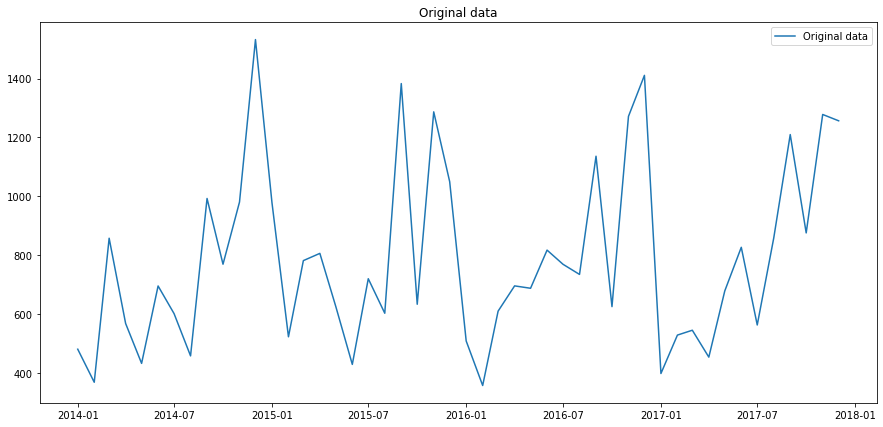

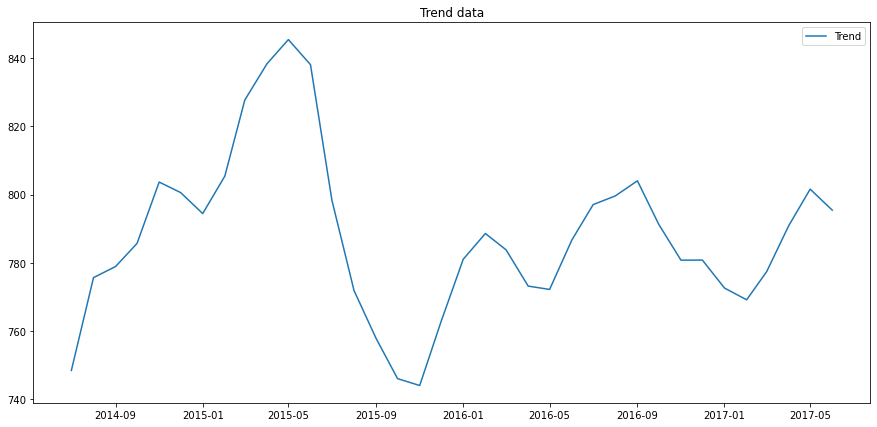

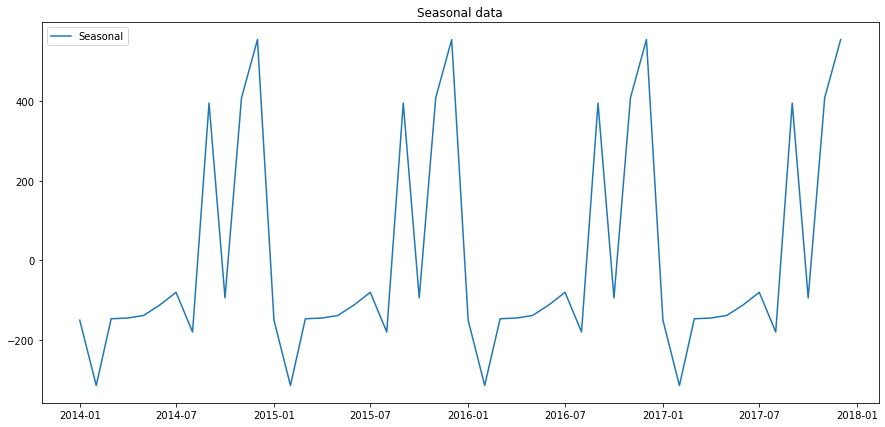

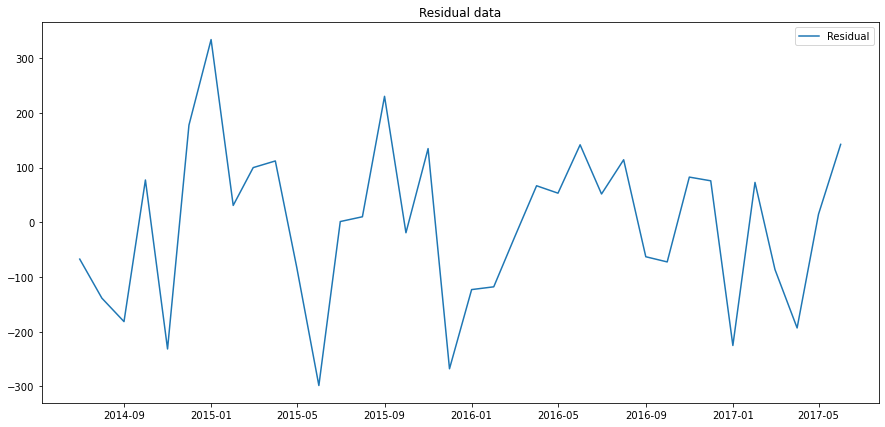

In [16]:
#Decomposing the data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(y)

plt.figure(figsize=(15,7))
plt.plot(y,label='Original data')
plt.legend()
plt.title('Original data')
plt.show()
# plotting the decomposed data
plt.figure(figsize=(15,7))
plt.plot(decompose.trend,label='Trend')
plt.title('Trend data')
plt.legend()

plt.show()

plt.figure(figsize=(15,7))
plt.plot(decompose.seasonal, label='Seasonal')
plt.title('Seasonal data')
plt.legend()

plt.show()

plt.figure(figsize=(15,7))
plt.plot(decompose.resid,label='Residual')
plt.title('Residual data')
plt.legend()

plt.show()


In [17]:
#Forecasting using SARIMAX since the data has seasonal component
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]   #12 since the graph repeats after 12 months as per trend
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [18]:
import statsmodels.api as sm
for order in pdq:
    for seasonal_order in seasonal_pdq:
        model=sm.tsa.statespace.SARIMAX(y,order=order,seasonal_order=seasonal_order,
                                       enforce_stationarity=False, 
                                        enforce_invertibility=False).fit()
        print('order: {},seasonal_order:{},AIC:{}'.format(order,seasonal_order,model.aic))

order: (0, 0, 0),seasonal_order:(0, 0, 0, 12),AIC:769.0817523205915


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


order: (0, 0, 0),seasonal_order:(0, 0, 1, 12),AIC:1101.08911241998
order: (0, 0, 0),seasonal_order:(0, 1, 0, 12),AIC:477.7170130919702
order: (0, 0, 0),seasonal_order:(0, 1, 1, 12),AIC:302.2702899929757
order: (0, 0, 0),seasonal_order:(1, 0, 0, 12),AIC:497.2314433418337


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (0, 0, 0),seasonal_order:(1, 0, 1, 12),AIC:965.7159144650936
order: (0, 0, 0),seasonal_order:(1, 1, 0, 12),AIC:318.0047199116341
order: (0, 0, 0),seasonal_order:(1, 1, 1, 12),AIC:304.2488280367333
order: (0, 0, 1),seasonal_order:(0, 0, 0, 12),AIC:720.9252270758103
order: (0, 0, 1),seasonal_order:(0, 0, 1, 12),AIC:2867.6747494755346
order: (0, 0, 1),seasonal_order:(0, 1, 0, 12),AIC:466.560742980915
order: (0, 0, 1),seasonal_order:(0, 1, 1, 12),AIC:291.62613896730545


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (0, 0, 1),seasonal_order:(1, 0, 0, 12),AIC:499.57525423582416


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (0, 0, 1),seasonal_order:(1, 0, 1, 12),AIC:2514.423901073215
order: (0, 0, 1),seasonal_order:(1, 1, 0, 12),AIC:319.9884876927765
order: (0, 0, 1),seasonal_order:(1, 1, 1, 12),AIC:291.8725576530987
order: (0, 1, 0),seasonal_order:(0, 0, 0, 12),AIC:677.894766843944


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (0, 1, 0),seasonal_order:(0, 0, 1, 12),AIC:1404.2772224001883
order: (0, 1, 0),seasonal_order:(0, 1, 0, 12),AIC:486.63785672274247
order: (0, 1, 0),seasonal_order:(0, 1, 1, 12),AIC:304.9671228171488
order: (0, 1, 0),seasonal_order:(1, 0, 0, 12),AIC:497.7889663004408


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (0, 1, 0),seasonal_order:(1, 0, 1, 12),AIC:1500.1603519348373
order: (0, 1, 0),seasonal_order:(1, 1, 0, 12),AIC:319.7714068109212
order: (0, 1, 0),seasonal_order:(1, 1, 1, 12),AIC:306.9113200215099
order: (0, 1, 1),seasonal_order:(0, 0, 0, 12),AIC:649.9056176709446
order: (0, 1, 1),seasonal_order:(0, 0, 1, 12),AIC:2813.970484046178
order: (0, 1, 1),seasonal_order:(0, 1, 0, 12),AIC:458.8705548483879
order: (0, 1, 1),seasonal_order:(0, 1, 1, 12),AIC:279.58062317168145
order: (0, 1, 1),seasonal_order:(1, 0, 0, 12),AIC:486.1832977439799
order: (0, 1, 1),seasonal_order:(1, 0, 1, 12),AIC:2589.441311852087
order: (0, 1, 1),seasonal_order:(1, 1, 0, 12),AIC:310.7574368417128
order: (0, 1, 1),seasonal_order:(1, 1, 1, 12),AIC:281.55766215066484
order: (1, 0, 0),seasonal_order:(0, 0, 0, 12),AIC:692.1645522067712


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (1, 0, 0),seasonal_order:(0, 0, 1, 12),AIC:900.5620084155145
order: (1, 0, 0),seasonal_order:(0, 1, 0, 12),AIC:479.46321478521355
order: (1, 0, 0),seasonal_order:(0, 1, 1, 12),AIC:304.2077675165163
order: (1, 0, 0),seasonal_order:(1, 0, 0, 12),AIC:480.9259367935383


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (1, 0, 0),seasonal_order:(1, 0, 1, 12),AIC:1510.8446613493015
order: (1, 0, 0),seasonal_order:(1, 1, 0, 12),AIC:304.46646750656447
order: (1, 0, 0),seasonal_order:(1, 1, 1, 12),AIC:304.58426921873314
order: (1, 0, 1),seasonal_order:(0, 0, 0, 12),AIC:665.7794442579784
order: (1, 0, 1),seasonal_order:(0, 0, 1, 12),AIC:22363.64676787757
order: (1, 0, 1),seasonal_order:(0, 1, 0, 12),AIC:468.36379856585614
order: (1, 0, 1),seasonal_order:(0, 1, 1, 12),AIC:293.34221949676254
order: (1, 0, 1),seasonal_order:(1, 0, 0, 12),AIC:482.5763324070439
order: (1, 0, 1),seasonal_order:(1, 0, 1, 12),AIC:2455.0188216728407
order: (1, 0, 1),seasonal_order:(1, 1, 0, 12),AIC:304.3753786391028
order: (1, 0, 1),seasonal_order:(1, 1, 1, 12),AIC:293.75131882860234
order: (1, 1, 0),seasonal_order:(0, 0, 0, 12),AIC:671.2513547541902


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (1, 1, 0),seasonal_order:(0, 0, 1, 12),AIC:1314.0138683419564
order: (1, 1, 0),seasonal_order:(0, 1, 0, 12),AIC:479.20034222811347
order: (1, 1, 0),seasonal_order:(0, 1, 1, 12),AIC:300.21306116144234
order: (1, 1, 0),seasonal_order:(1, 0, 0, 12),AIC:475.34036585859474


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (1, 1, 0),seasonal_order:(1, 0, 1, 12),AIC:1008.6868986960677
order: (1, 1, 0),seasonal_order:(1, 1, 0, 12),AIC:300.62709013121616
order: (1, 1, 0),seasonal_order:(1, 1, 1, 12),AIC:302.3264992592751
order: (1, 1, 1),seasonal_order:(0, 0, 0, 12),AIC:649.0318019776288
order: (1, 1, 1),seasonal_order:(0, 0, 1, 12),AIC:3185.1513954155857
order: (1, 1, 1),seasonal_order:(0, 1, 0, 12),AIC:460.47626873973917
order: (1, 1, 1),seasonal_order:(0, 1, 1, 12),AIC:281.387300692997
order: (1, 1, 1),seasonal_order:(1, 0, 0, 12),AIC:469.5250354658575


C:\Users\Shakeel\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


order: (1, 1, 1),seasonal_order:(1, 0, 1, 12),AIC:2592.6832126527925
order: (1, 1, 1),seasonal_order:(1, 1, 0, 12),AIC:297.7875439854108
order: (1, 1, 1),seasonal_order:(1, 1, 1, 12),AIC:283.36610149722134


# Fitting the SARIMAX Model

In [19]:
model=sm.tsa.statespace.SARIMAX(y,order=(1,0,1),seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -148.188
Date:                             Thu, 04 Mar 2021   AIC                            304.375
Time:                                     23:35:32   BIC                            308.917
Sample:                                 01-01-2014   HQIC                           305.518
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7267      0.180      4.049      0.000       0.375       1.079
ma.L1         -1.0000      0.413     -2.423      0.015      -1.809      -0.191
ar.S.L12      -0.2668      0.169     -1.582      0.114      -0.597       0.064
sigma2      2.196e+04   1.88e-05   1.17e+09      0.000     2.2e+04     2.2e+04
===================================================================================
Ljung-Box (Q):                       18.20   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.69   Prob(JB):                         0.66
Heteroskedasticity (H):               0.53   Skew:                             0.01
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+24. Standard errors may be unstable.
"""

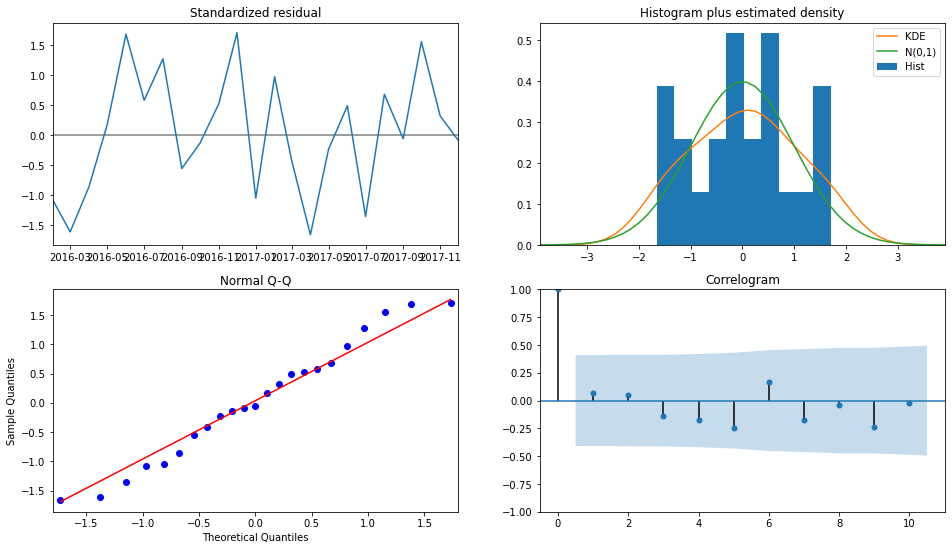

In [20]:
model.plot_diagnostics(figsize=(16,9))
plt.show()

# Validating Forecasts

In [21]:
# Validating forecasts from 2017-01-01 
pred=model.get_prediction(pd.to_datetime('01/01/2017'),dynamic=False)
#pred1=model.get_prediction(pd.to_datetime('01/01/2017'),dynamic=True)

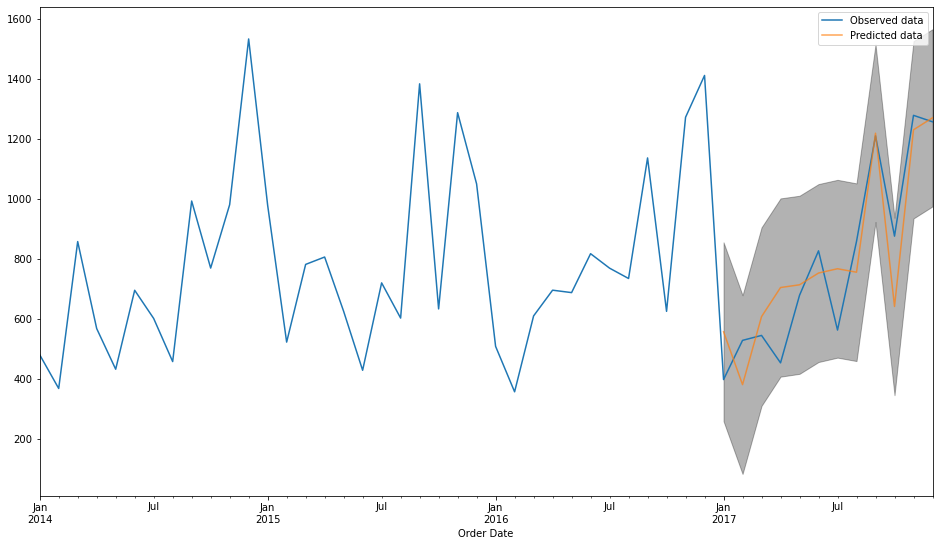

In [22]:
pred_ci=pred.conf_int()    #confidence Interval
#plt.figure(figsize=(16,9))
ax=y.plot(label='Observed data',figsize=(16,9))
pred.predicted_mean.plot(ax=ax,label='Predicted data',alpha=0.7)   #aplha denotes transparency
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.3)
#pred1.predicted_mean.plot(ax=ax,label='Predicted data1')
plt.legend()
plt.show()

# RMSE

In [23]:
y_observed=y['2017/01/01':]
y_predicted=pred.predicted_mean
rmse=np.sqrt(((y_observed-y_predicted)**2).mean())
rmse

138.55769290699922

# Visualizing Forecasts

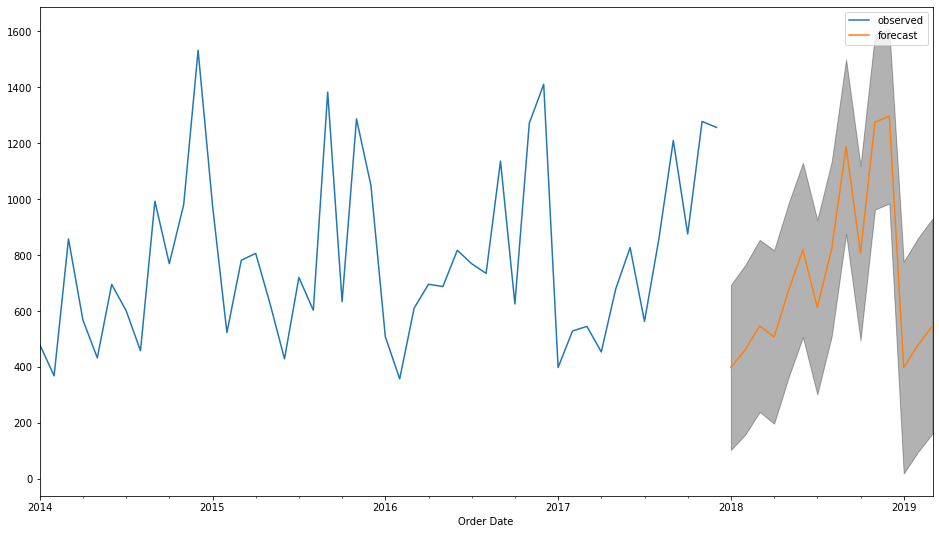

In [24]:
pred_fc=model.get_forecast(steps=15)
#fc_mean=fc.predicted_mean
pred_ci=pred_fc.conf_int()
ax=y.plot(label='observed',figsize=(16,9))
pred_fc.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],alpha=0.3,color='k')
plt.legend()
plt.show()

# Conclusion